# **1. SET UP AND LOAD DATA**

**1.1 Install Dependencies and Set Up**

In [6]:
!pip install tensorflow opencv-python matplotlib

In [7]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [8]:
import tensorflow as tf
import os

In [9]:
os.path.join('data','happy')

'data/happy'

In [10]:
os.listdir('data')

['happy', 'sad']

**1.2 Removing Dodgy Images**

In [11]:
import cv2
import imghdr

In [12]:
data_dir='data'

In [13]:
image_exts=['jpeg','jpg','bmp','png']

In [14]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path=os.path.join(data_dir,image_class,image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in image_exts list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with the Image {}".format(image_path))

Image not in image_exts list data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in image_exts list data/happy/traitshappypeople.jpg
Image not in image_exts list data/happy/happy-home.jpg
Image not in image_exts list data/happy/stock-photo-collage-of-many-different-happy-human-faces-of-modern-people-83672029.jpg
Image not in image_exts list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in image_exts list data/happy/casual-portrait-in-positive-view-big-smile-beautiful-model-posing-1554086789.jpg
Image not in image_exts list data/happy/2560px-Happy_People.jpg
Image not in image_exts list data/happy/depositphotos_376490084-stock-photo-collage-of-happy-smiling-faces.jpg
Image not in image_exts list data/happy/happy-young-man-sitting-home-260nw-2248472067.jpg
Image not in image_exts list data/happy/562f31e102ec4932bf528c38e887984c.webp
Image not in image_exts list data/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in image_exts li

**1.3 Load Data**

In [15]:
tf.data.Dataset??

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 330 files belonging to 2 classes.


In [18]:
#get another batch from iterator
data_iterator=data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

In [20]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [21]:
len(batch)

2

In [22]:
#Class 1 = SAD People
#Class 0 = HAPPY People
batch[1]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int32)

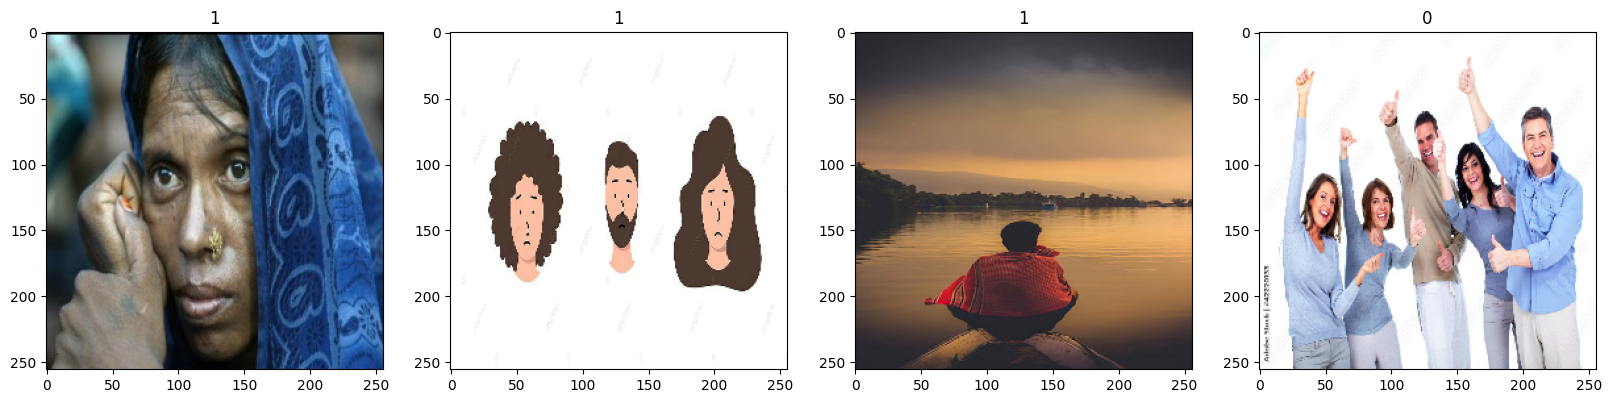

In [23]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [24]:
scaled=batch[0]/255
print(scaled.min())
print(scaled.max())

0.0
1.0


# **2. Preproccess Data**

**2.1 Scale Data**

In [25]:
data = data.map(lambda x, y: (x/255, y))

In [26]:
scaled_iterator = data.as_numpy_iterator().next()

In [27]:
scaled_iterator[0].min()

0.0

**2.2 Split Data**

In [28]:
len(data)

11

In [29]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [30]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

# **3. Deep Learning Model**

**3.1 Build Deep Learning Model**

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [32]:
model=Sequential()

In [33]:
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

**3.2 Train Data**

In [36]:
logdir='logs'

In [37]:
tensorboard_callbacks=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist=model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callbacks])

Epoch 1/30
7/7 [==============================] - 22s 3s/step - loss: 0.7332 - accuracy: 0.5848 - val_loss: 0.5856 - val_accuracy: 0.6719
Epoch 2/30
7/7 [==============================] - 23s 3s/step - loss: 0.5971 - accuracy: 0.6473 - val_loss: 0.5594 - val_accuracy: 0.6406
Epoch 3/30
7/7 [==============================] - 21s 2s/step - loss: 0.5703 - accuracy: 0.6607 - val_loss: 0.5632 - val_accuracy: 0.7500
Epoch 4/30
7/7 [==============================] - 21s 3s/step - loss: 0.5381 - accuracy: 0.7098 - val_loss: 0.4818 - val_accuracy: 0.8281
Epoch 5/30
7/7 [==============================] - 20s 3s/step - loss: 0.5184 - accuracy: 0.7455 - val_loss: 0.4865 - val_accuracy: 0.8281
Epoch 6/30
7/7 [==============================] - 26s 3s/step - loss: 0.4178 - accuracy: 0.8527 - val_loss: 0.3045 - val_accuracy: 0.8906
Epoch 7/30
7/7 [==============================] - 26s 3s/step - loss: 0.4099 - accuracy: 0.8170 - val_loss: 0.2906 - val_accuracy: 0.8438
Epoch 8/30
7/7 [==================

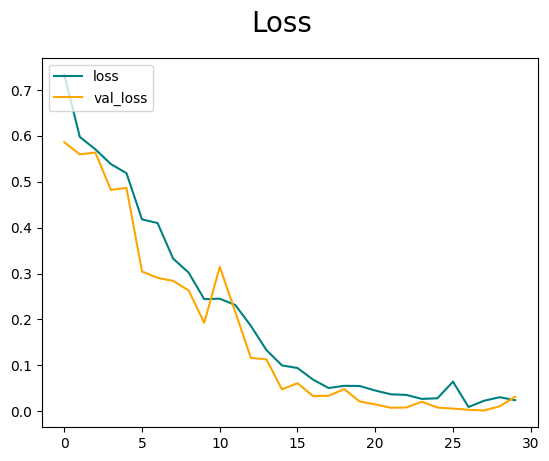

In [39]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

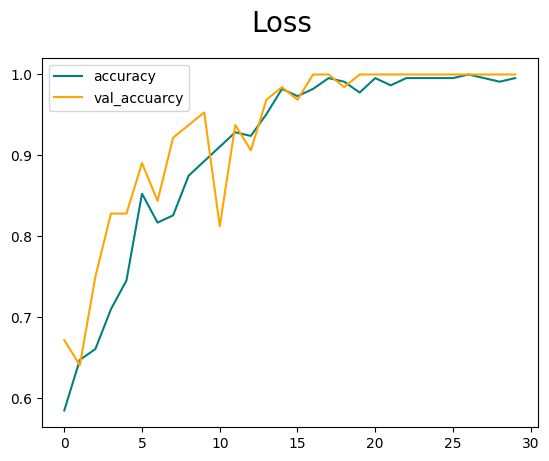

In [40]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuarcy')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **4. Evaluate Performance**

**4.1 Evaluate**

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [43]:
len(test)

2

In [44]:
for batch in test.as_numpy_iterator():
  x, y=batch
  yhat=model.predict(x)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 196ms/step


In [45]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:0.9285714030265808,Accuracy:0.976190447807312


**4.2 Sad Test**

In [46]:
import cv2

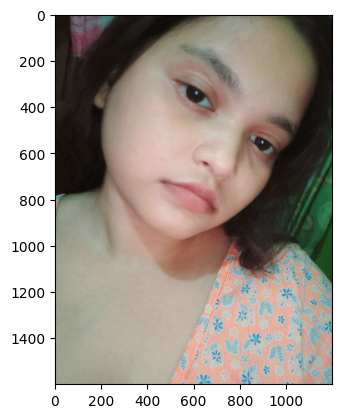

In [55]:
img=cv2.imread('Sad.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

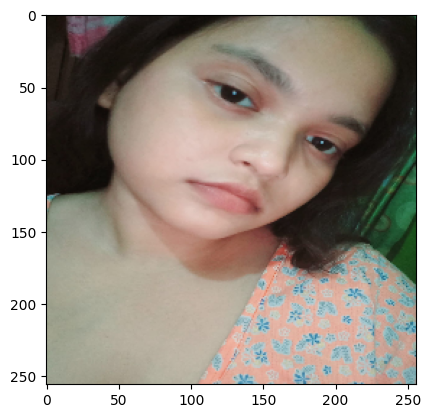

In [56]:
resize = tf.image.resize(img, (256, 256))
resize1=resize.numpy().astype('uint8')
rgb_image = cv2.cvtColor(resize1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

In [57]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [58]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 34ms/step


In [59]:
yhat

array([[0.75049466]], dtype=float32)

In [60]:
if yhat>0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad


**4.3 Happy Test**

In [61]:
import cv2

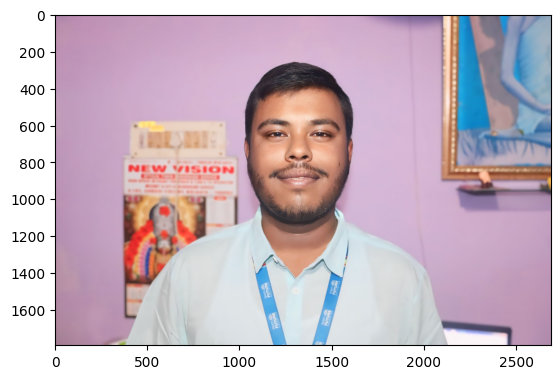

In [62]:
img=cv2.imread('Subho cv.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

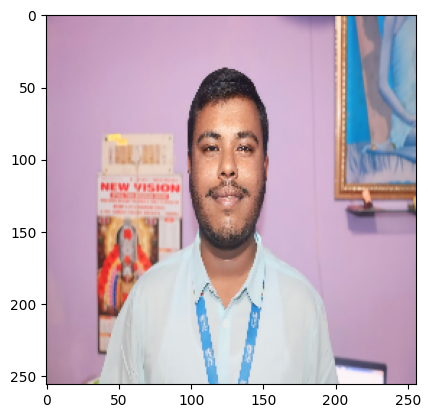

In [63]:
resize = tf.image.resize(img, (256, 256))
resize1=resize.numpy().astype('uint8')
rgb_image = cv2.cvtColor(resize1, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()

In [64]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [65]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 35ms/step


In [66]:
yhat

array([[0.32688105]], dtype=float32)

In [67]:
if yhat>0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy


# **5. Save the Model**

5.1 Save the Model

In [74]:
from tensorflow.keras.models import load_model

In [76]:
model.save(os.path.join('models','happysadmodel.h5'))

In [77]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [78]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 100ms/step


In [79]:
if yhatnew>0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy
